In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iq_cl = pd.read_csv('iq_classification.csv')

In [4]:
iq_cl

,IQ range;Classification;Percentile (%)
0,180-;Genius; <0.01%
1,160-179;Almost genius;0.01%
2,145-159;Very gifted;0.1%
3,130-144;Gifted;2.3%
4,120-129 ;Moderately gifted;6.7%
5,110-119;Above average;16.1%
6,90-109;Average intelligence;50.0%
7,85-89;Below average;16.1%
8,70-84;Borderline intellectual functioning;2.3%
9,50-69;Mild intellectual disability;2.3%


In [6]:
avg = pd.read_csv('avgIQpercountry.csv')
avg.head()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352


In [7]:
avg.dtypes

Rank                                int64
Country                            object
Average IQ                        float64
Continent                          object
Literacy Rate                     float64
Nobel Prices                        int64
HDI (2021)                        float64
Mean years of schooling - 2021    float64
 GNI - 2021                       float64
Population - 2023                  object
dtype: object

In [8]:
avg.isnull().sum()

Rank                               0
Country                            0
Average IQ                         0
Continent                          0
Literacy Rate                      0
Nobel Prices                       0
HDI (2021)                        14
Mean years of schooling - 2021    14
 GNI - 2021                       14
Population - 2023                  0
dtype: int64

In [9]:
avg.shape

(193, 10)

In [11]:
avg.nunique()

Rank                              193
Country                           193
Average IQ                        173
Continent                           8
Literacy Rate                      52
Nobel Prices                       22
HDI (2021)                        153
Mean years of schooling - 2021     85
 GNI - 2021                       179
Population - 2023                 192
dtype: int64

In [12]:
avg.sort_values('Average IQ', ascending=False)

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8791092


In [13]:
continent = avg.groupby('Continent')['Average IQ'].mean()
continent

Continent
Africa             68.566346
Asia               85.804375
Central America    75.113043
Europe             94.904878
Europe/Asia        89.196667
North America      94.540000
Oceania            88.134000
South America      83.783333
Name: Average IQ, dtype: float64

In [14]:
school = avg.groupby('Continent')['Mean years of schooling - 2021'].mean()
school

Continent
Africa              5.806122
Asia                9.125000
Central America     9.031579
Europe             12.195122
Europe/Asia        11.400000
North America      12.233333
Oceania             9.087500
South America       9.575000
Name: Mean years of schooling - 2021, dtype: float64

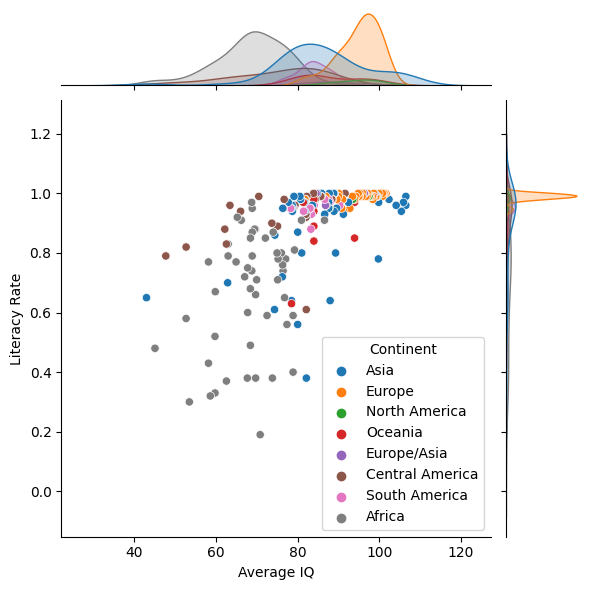

In [22]:
sns.jointplot(data=avg, x='Average IQ', y='Literacy Rate', hue='Continent')